<a href="https://colab.research.google.com/github/captmmari/Independent-week4-project/blob/main/Moringa_Independent_week02_Core_Project_Simon_Mmari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importing Dataset

In [7]:
# Import pandas
import pandas as pd
# importing numpy
import numpy as np
# import seaborn
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt

# 1.1 Loading Datasets

In [8]:
# Loading financial dataset
df = pd.read_csv('/content/Financial Dataset - 1.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
# Loading variable Definitions
df1 = pd.read_csv('/content/VariableDefinitions.csv')
df1

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# 1.2 Cleaning dataset


In [10]:
# Checking for null
# Droppinf nulls if present
df.isnull().sum()
df.dropna().head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
# Checking for Ouliers

In [12]:
# Checking for anomalies

# 1.3 Univariate analysis

In [13]:
# Finding mean value for the Respondent Age
df['Respondent Age'].mean()

38.804299702000854

In [14]:
# finding the modal value of gender respondent
df['gender_of_respondent'].mode()

0    Female
dtype: object

In [15]:
# Finding the median value of household size
df['household_size'].median()

3.0

In [16]:
# finding the standard deviation of respondent age
df['Respondent Age'].std()

16.51999610879876

In [17]:
# finding the variance of respondent age
df['Respondent Age'].var()

272.9102714347262

In [18]:
# finding the range of respondent age
df_max = df['Respondent Age'].max()
df_min = df['Respondent Age'].min()
df_max - df_min

84.0

In [19]:
#Finding the quartile values
df['Respondent Age'].quantile([0.25, 0.5, 0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64

In [20]:
# Determining the skewness
df['Respondent Age'].skew()

0.8418012375387167

In [21]:
# Kurtois
df['Respondent Age'].kurt()

0.10110811880734305

In [22]:
# Displaying the summary statistics of the dataframe
df['Respondent Age'].describe()

count    23490.000000
mean        38.804300
std         16.519996
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

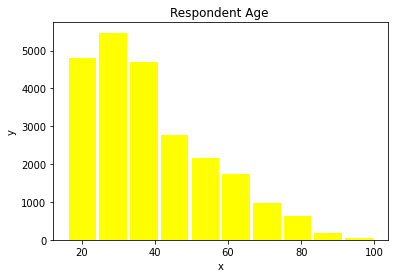

In [23]:
# Histogram of respondet age
df_res = df['Respondent Age']
plt.hist(df_res, bins=10, color='yellow', histtype='bar', rwidth=0.9)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Respondent Age ')
plt.show()

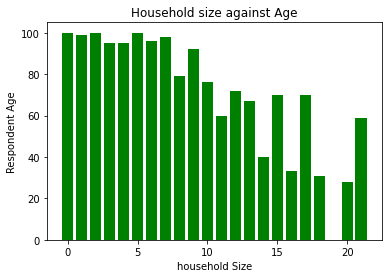

In [24]:
# Bar chart representing respondent age by maritatl status
df_mar = df['household_size']
df_mur = df['Respondent Age']
plt.bar(df_mar, df_mur, color='green')
plt.xlabel('household Size')
plt.ylabel('Respondent Age')
plt.title('Household size against Age')
plt.show()

# 0.1 Bivariate Analysis

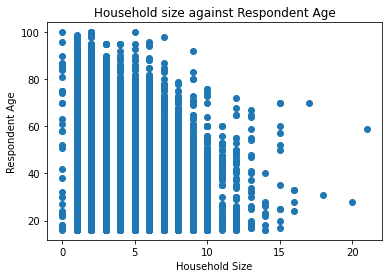

In [25]:
# scatter plot between household size and Respondent Age
df.plot(x = 'household_size', y = 'Respondent Age', kind='scatter')


plt.scatter(df["household_size"] , df["Respondent Age"])
plt.title('Household size against Respondent Age')
plt.xlabel('Household Size')
plt.ylabel('Respondent Age')
plt.show()

In [26]:
# Determining the realationship between Household size and Respondent Age
pearson_coeff = df["household_size"].corr(df["Respondent Age"], method="pearson") 
print(pearson_coeff)


coeff = df["household_size"].corr(df["Respondent Age"]) 
print(coeff)

-0.11970929714642328
-0.11970929714642328


In [27]:
# Calculating the pearson coefficient
df["household_size"].corr(df["Respondent Age"]) 

-0.11970929714642328

# 0.3 Multivariate Analysis

In [28]:
# previewing dataset columns
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [29]:
# dropping unnecessary columns
df.drop(['The relathip with head', 'uniqueid'], axis=1, inplace=True)

In [30]:
# Dropping missing values
df.dropna(inplace=True)

In [31]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(407.4672850438383, 1.2286996971879689e-55)

# Explanatory and data documentation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


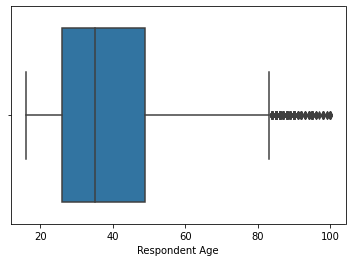

In [38]:
# Looking for outliers
sns.boxplot(df['Respondent Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


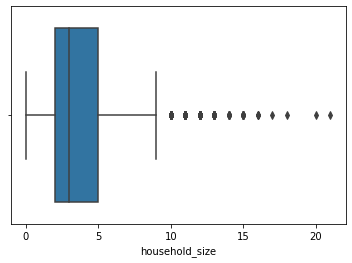

In [39]:
# Looking for Outliers
sns.boxplot(df['household_size'])

In [44]:
# Checking for duplicates
print(df.duplicated().sum())

4931


In [46]:
# Dropping duplicate files
df.drop_duplicates(inplace=True)

In [47]:
# Checking if duplicates were eliminated
print(df.duplicated().sum())

0
